# NLTK

 It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification,
  tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

In [1]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\APinto\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, and father is always driving my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."
doc6 = "I am doing well at school, but my sister could study a little more."
doc7 = "Currently, I am studying at a nearby school. My father does not need driving me there."
# topics: health and sugar (doc1,doc5), driving (doc2, doc3, doc7), school (doc4, doc6, doc7)

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5, doc6, doc7]

In [3]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]

## a. Tokenize and tag some text:

In [4]:
import nltk
#!pip install fitz
!pip install pymupdf
import fitz
import pandas as pd 

In [5]:
doc = fitz.open('C:\\Users\\APinto\\OneDrive\\Documentos\\pdfs cv\\BABOK Guide v3.pdf')


In [6]:
#text = page.get_text()

## Sentiment Analysis of portuguese tweets

In [7]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import re

# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud,STOPWORDS
# from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
# from bs4 import BeautifulSoup
# import spacy
# import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
# from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# from textblob import TextBlob
# from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# import os
# print(os.listdir("../input"))
# import warnings
# warnings.filterwarnings('ignore')
# !pip install seaborn
# !pip install matplotlib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\APinto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#importing the training data
twitter_data=pd.read_csv('C:\\Test folder\\NoThemeTweets.csv')
twitter_data.head(10)

,id,tweet_text,tweet_date,sentiment,query_used
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:)
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:)
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:)
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:)
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:)
5,1031760822543020032,"@BadWolf_Wagner @DanieVedo Eu entendi, mas iss...",Tue Aug 21 04:32:03 +0000 2018,Positivo,:)
6,1031760780641718272,@Chyko661 @g1 [+] Carcinoma Hepatico (Cancer d...,Tue Aug 21 04:31:53 +0000 2018,Positivo,:)
7,1031760749813805058,"Aquela mina da limpeza, que tinha um marido co...",Tue Aug 21 04:31:46 +0000 2018,Positivo,:)
8,1031760690778976262,"@narryfools aqui, espero que você melhore logo...",Tue Aug 21 04:31:32 +0000 2018,Positivo,:)
9,1031760658600284160,@fefocaires se és feliz trabalhando nisso entã...,Tue Aug 21 04:31:24 +0000 2018,Positivo,:)


In [9]:
twitter_data = twitter_data[['tweet_text', 'sentiment']]
print(twitter_data.shape)
twitter_data.head(10)

(785814, 2)


,tweet_text,sentiment
0,@Tixaa23 14 para eu ir :),Positivo
1,@drexalvarez O meu like eu já dei na época :),Positivo
2,Eu só queria conseguir comer alguma coisa pra ...,Positivo
3,:D que lindo dia !,Positivo
4,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Positivo
5,"@BadWolf_Wagner @DanieVedo Eu entendi, mas iss...",Positivo
6,@Chyko661 @g1 [+] Carcinoma Hepatico (Cancer d...,Positivo
7,"Aquela mina da limpeza, que tinha um marido co...",Positivo
8,"@narryfools aqui, espero que você melhore logo...",Positivo
9,@fefocaires se és feliz trabalhando nisso entã...,Positivo


In [10]:
#Summary of the dataset
twitter_data.describe()

,tweet_text,sentiment
count,785814,785814
unique,776753,2
top,Bom dia :),Negativo
freq,227,522707


In [11]:
#Label count
twitter_data['sentiment'].value_counts()

Negativo    522707
Positivo    263107
Name: sentiment, dtype: int64

In [12]:
# Balance the dataset
data_pos = twitter_data[twitter_data['sentiment'] == 'Positivo']
data_neg = twitter_data[twitter_data['sentiment'] == 'Negativo']

In [13]:
data_pos.head()

,tweet_text,sentiment
0,@Tixaa23 14 para eu ir :),Positivo
1,@drexalvarez O meu like eu já dei na época :),Positivo
2,Eu só queria conseguir comer alguma coisa pra ...,Positivo
3,:D que lindo dia !,Positivo
4,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Positivo


In [14]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [15]:
data_pos.head()

,tweet_text,sentiment
0,@Tixaa23 14 para eu ir :),Positivo
1,@drexalvarez O meu like eu já dei na época :),Positivo
2,Eu só queria conseguir comer alguma coisa pra ...,Positivo
3,:D que lindo dia !,Positivo
4,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Positivo


In [16]:

twitter_data = pd.concat([data_pos, data_neg])
twitter_data = twitter_data.sample(frac=1).reset_index()
twitter_data.tail()

,index,tweet_text,sentiment
39995,5892,"@danielsv84 Oi Daniel, conforme falamos o seu ...",Positivo
39996,87660,@ktaehyungz eu não tenho como não me preocupar...,Negativo
39997,1151,@alvaroleme @vicpedia Então ganhou mais um :),Positivo
39998,13617,@RafaHipHop7344 E vamos tomar o pequeno almoço :),Positivo
39999,2674,Continuem :) https://t.co/tPok6S0rnX,Positivo


In [17]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('portuguese')

In [18]:
import string
# for c in string.punctuation:
#     print("[" + c + "]")

In [19]:
#lowercase
twitter_data['tweet_text']=twitter_data['tweet_text'].str.lower()
twitter_data['tweet_text'].tail()

39995    @danielsv84 oi daniel, conforme falamos o seu ...
39996    @ktaehyungz eu não tenho como não me preocupar...
39997        @alvaroleme @vicpedia então ganhou mais um :)
39998    @rafahiphop7344 e vamos tomar o pequeno almoço :)
39999                 continuem :) https://t.co/tpok6s0rnx
Name: tweet_text, dtype: object

In [20]:
#Remove punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
twitter_data['tweet_text']=twitter_data['tweet_text'].apply(lambda x: cleaning_punctuations(x))
twitter_data['tweet_text'].tail()

39995    danielsv84 oi daniel conforme falamos o seu ca...
39996    ktaehyungz eu não tenho como não me preocupar ...
39997            alvaroleme vicpedia então ganhou mais um 
39998       rafahiphop7344 e vamos tomar o pequeno almoço 
39999                        continuem  httpstcotpok6s0rnx
Name: tweet_text, dtype: object

In [21]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
twitter_data['tweet_text'] = twitter_data['tweet_text'].apply(lambda x: cleaning_repeating_char(x))
twitter_data['tweet_text'].tail()

39995    danielsv84 oi daniel conforme falamos o seu ca...
39996    ktaehyungz eu não tenho como não me preocupar ...
39997            alvaroleme vicpedia então ganhou mais um 
39998       rafahiphop7344 e vamos tomar o pequeno almoço 
39999                        continuem  httpstcotpok6s0rnx
Name: tweet_text, dtype: object

In [22]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
twitter_data['tweet_text'] = twitter_data['tweet_text'].apply(lambda x: cleaning_numbers(x))
twitter_data['tweet_text'].tail()

39995    danielsv oi daniel conforme falamos o seu caso...
39996    ktaehyungz eu não tenho como não me preocupar ...
39997            alvaroleme vicpedia então ganhou mais um 
39998           rafahiphop e vamos tomar o pequeno almoço 
39999                          continuem  httpstcotpoksrnx
Name: tweet_text, dtype: object

In [23]:

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
twitter_data['tweet_text']=twitter_data['tweet_text'].apply(simple_stemmer)

twitter_data['tweet_text'].tail()

39995    danielsv oi daniel conform falamo o seu caso e...
39996    ktaehyungz eu não tenho como não me preocupar ...
39997               alvarolem vicpedia então ganhou mai um
39998             rafahiphop e vamo tomar o pequeno almoço
39999                           continuem httpstcotpoksrnx
Name: tweet_text, dtype: object

In [24]:
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
twitter_data['tweet_text'] =twitter_data['tweet_text'].apply(remove_stopwords)
twitter_data['tweet_text'].tail()

39995    danielsv oi daniel conform falamo caso tratati...
39996    ktaehyungz preocupar important demai pra mim s...
39997                  alvarolem vicpedia então ganhou mai
39998                 rafahiphop vamo tomar pequeno almoço
39999                           continuem httpstcotpoksrnx
Name: tweet_text, dtype: object

In [25]:
# Spliting the training dataset
X_train, X_test, y_train, y_test = train_test_split(twitter_data['tweet_text'], twitter_data['sentiment'], test_size=0.33)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26800,) (13200,) (26800,) (13200,)


In [27]:
X_train.head()

34904    vi tal ma preocupado ant ver tweet ma achei es...
30138                         leticiarafa dieta pq tô pobr
39792    braian hahahahahahahah tão difícil pegar porqu...
2759                                    pmcoelho tranquilo
17746    kappan deve estar feria serrao pu tra quero ve...
Name: tweet_text, dtype: object

### Transforming Dataset using TF-IDF Vectorizer

In [28]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  190468


c:\Users\APinto\anaconda3\envs\projeto_apspacy\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



In [29]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [30]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Modelling

#### Bernoulli

              precision    recall  f1-score   support

    Negativo       0.61      0.94      0.74      6608
    Positivo       0.86      0.40      0.55      6592

    accuracy                           0.67     13200
   macro avg       0.74      0.67      0.64     13200
weighted avg       0.74      0.67      0.64     13200

bnb_tfidf_score : 0.6693181818181818


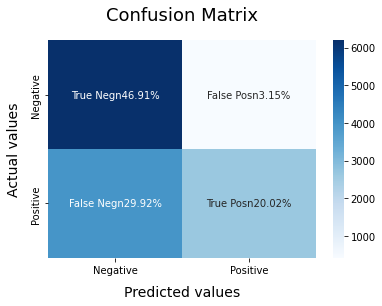

In [31]:
BNBmodel = BernoulliNB()
bnbmodel = BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

y_pred1 = BNBmodel.predict(X_test)
BNB_tfidf_score=accuracy_score(y_test,y_pred1)
print("bnb_tfidf_score :",BNB_tfidf_score)

##### SVC MODEL

              precision    recall  f1-score   support

    Negativo       0.75      0.76      0.75      6608
    Positivo       0.75      0.75      0.75      6592

    accuracy                           0.75     13200
   macro avg       0.75      0.75      0.75     13200
weighted avg       0.75      0.75      0.75     13200

svc_tfidf_score : 0.7528030303030303


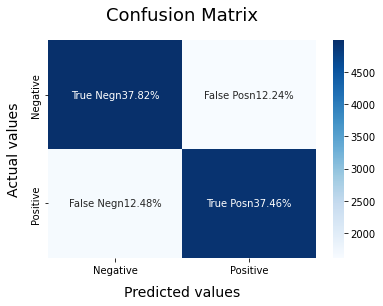

In [32]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
SVC_tfidf_score=accuracy_score(y_test,y_pred2)
print("svc_tfidf_score :",SVC_tfidf_score)

In [33]:
#### Logistic Regression

              precision    recall  f1-score   support

    Negativo       0.76      0.75      0.75      6608
    Positivo       0.75      0.76      0.75      6592

    accuracy                           0.75     13200
   macro avg       0.75      0.75      0.75     13200
weighted avg       0.75      0.75      0.75     13200

lr_tfidf_score : 0.7520454545454546


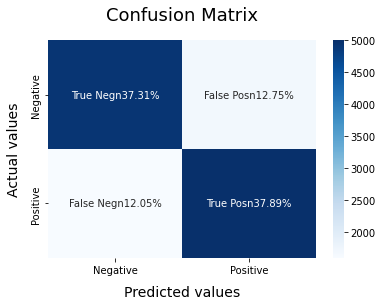

In [34]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
LR_tfidf_score=accuracy_score(y_test,y_pred3)
print("lr_tfidf_score :",LR_tfidf_score)